# Combining networks and check integrity

In [4]:
import sys
import json
default = {'scenario': 'base', 'training_folder': '../..'} # Default execution parameters
manual, argv = (True, default) if 'ipykernel' in sys.argv[0] else (False, dict(default, **json.loads(sys.argv[1])))
print(argv)
sys.path.insert(0, r'../../../quetzal') # Add path to quetzal
from quetzal.model import stepmodel

import geopandas as gpd

if manual:
    %matplotlib inline

input_folder = argv['training_folder'] + '/inputs/'

# Import Networks

## Transport Network

In [5]:
sm = stepmodel.StepModel(epsg = 4326, coordinates_unit = 'degree')

sm.links = gpd.read_file(input_folder + 'gtfs/links.geojson', driver='GeoJSON').set_index('index')
sm.nodes = gpd.read_file(input_folder + 'gtfs/nodes.geojson', driver='GeoJSON').set_index('index')

# Add zones
sm.zones = gpd.read_file(input_folder + 'zones/zones.geojson', driver='GeoJSON').set_index('index')

# Road Network

In [6]:
sm.road_links = gpd.read_file(input_folder + 'road/road_links.geojson', driver='GeoJSON').set_index('index')
sm.road_nodes = gpd.read_file(input_folder + 'road/road_nodes.geojson', driver='GeoJSON').set_index('index')

# Road Integrity

In [7]:
sm.integrity_fix_collision()

can not add prefixes on table:  footpaths


In [8]:
sm.integrity_fix_road_network(cutoff=10, recursive_depth=5)

direct: 5698it [00:00, 18621.16it/s]
reversed: 5698it [00:00, 18656.30it/s]
5690it [00:00, 17442.81it/s]


In [9]:
sm.integrity_fix_nodeset_consistency()

## Road Test

In [10]:
sm.integrity_test_dead_ends()

5690it [00:00, 52581.39it/s]


In [11]:
sm.integrity_test_isolated_roads()

# Transport Integrity

In [12]:
sm.integrity_fix_collision()

In [13]:
sm.integrity_fix_circular_lines()

dropped circular lines: ['100100323:323_1', '100100059:59_2', '100100191:191_2', '100100249:249_1', '100100129:129_1', '100100105:105_1', '100100290:290_1']


In [14]:
sm.integrity_fix_sequences()

In [15]:
sm.integrity_fix_nodeset_consistency()

## Transport Test

In [16]:
sm.integrity_test_all(errors='raise')

5690it [00:00, 59834.20it/s]

passed: integrity_test_circular_lines
passed: integrity_test_collision
passed: integrity_test_dead_ends
passed: integrity_test_isolated_roads
passed: integrity_test_nodeset_consistency



5690it [00:00, 18764.28it/s]


passed: integrity_test_road_network
passed: integrity_test_road_nodeset_consistency
passed: integrity_test_sequences


# Export

In [18]:
# Convert model to meters
sm = sm.change_epsg(epsg=3857, coordinates_unit='meter')
sm.to_zippedpickles(argv['training_folder'] + '/model/{scen}/networks'.format(scen=argv['scenario']))

orphan_nodes: 100%|██████████| 17/17 [00:00<00:00, 50.87it/s]    


Reprojecting model from epsg 3857 to epsg 3857: 100%|██████████| 17/17 [00:00<00:00, 18.64it/s]


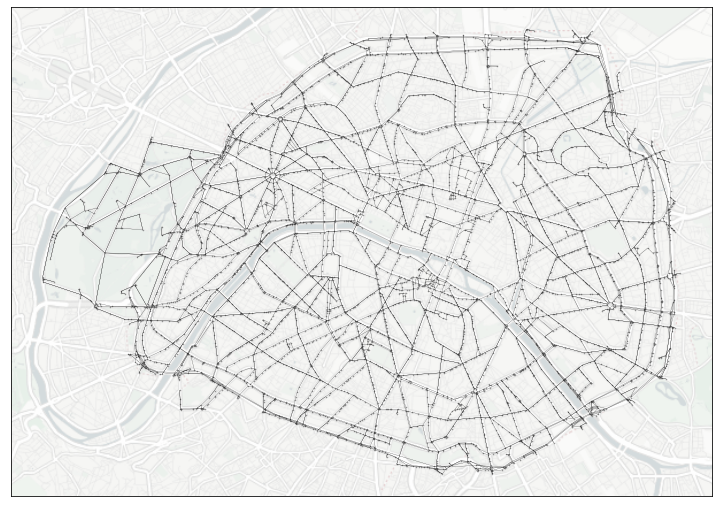

In [19]:
if manual:
    sm_3857 = sm.change_epsg(epsg=3857, coordinates_unit='meter').copy()
    sm_3857.plot(
        'road_nodes', color='grey', markersize=0.2,
        ax=sm.plot(
            'road_links', figsize=[16, 9], 
            basemap_url= 'http://a.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png', linewidth=0.2, color='black'
        ),    
    )

# END